# Analyzing Layoffs in 2022
**About the dataset**: This dataset is from Kaggle, which was scraped from Layoffs.fyi. Original dataset can be tracked at https://layoffs.fyi/.

**Objective**: Analyze mass layoffs in 2022 and discover useful insights and patterns.

**Required libraries**: Pandas, Numpy, Matplotlib, Seaborn.

## Downloading the Dataset

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/theakhilb/layoffs-data-2022'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./layoffs-data-2022" (use force=True to force download)


The dataset has been downloaded and extracted.

In [ ]:
data_dir = './layoffs-data-2022'

In [ ]:
import os
os.listdir(data_dir)

['layoffs_data.csv']

In [ ]:
project_name = "layoff-2022" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning

**Load the dataset into a data frame using Pandas**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

In [ ]:
# Read data into a DataFrame
layoff_df = pd.read_csv('./layoffs-data-2022/layoffs_data.csv')

In [ ]:
# check the first 5 rows
layoff_df.head()

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,List_of_Employees_Laid_Off
0,Autobooks,Detroit,Finance,2022-12-10,https://www.crainsdetroit.com/technology/finte...,97.0,Series C,2022-12-11 03:36:27,United States,NaN,NaN,Unknown
1,PharmEasy,Mumbai,Healthcare,2022-12-10,https://inc42.com/buzz/pharmeasy-lays-off-more...,1600.0,Unknown,2022-12-11 06:25:36,India,NaN,NaN,Unknown
2,Playtika,Tel Aviv,Consumer,2022-12-09,https://en.globes.co.il/en/article-playtika-to...,NaN,IPO,2022-12-11 06:01:30,Israel,600.0,0.15,Unknown
3,Alice,Sao Paulo,Healthcare,2022-12-09,https://startups.com.br/demissoes/alice-faz-no...,174.0,Series C,2022-12-11 03:31:04,Brazil,113.0,0.16,Unknown
4,Primer,London,Finance,2022-12-09,https://techcrunch.com/2022/12/09/primer-the-u...,73.0,Series B,2022-12-09 16:37:23,United Kingdom,85.0,0.33,Unknown


**Explore the number of rows & columns, ranges of values etc**

In [ ]:
# Check the dimension of dataset
layoff_df.shape

(1792, 12)

There are 1792 rows and 12 columns. 

In [ ]:
# Check the columns of the dataset
layoff_df.columns

Index(['Company', 'Location', 'Industry', 'Date', 'Source', 'Funds_Raised',
       'Stage', 'Date_Added', 'Country', 'Laid_Off_Count', 'Percentage',
       'List_of_Employees_Laid_Off'],
      dtype='object')

**Handle missing, incorrect and invalid data**

In [ ]:
# Count the number of missing values for each column
for col in layoff_df.columns:
    missing_values = layoff_df[col].isnull().sum()
    print('Missing value for column \'{}\' is {}'.format(col, missing_values))

Missing value for column 'Company' is 0
Missing value for column 'Location' is 0
Missing value for column 'Industry' is 0
Missing value for column 'Date' is 1
Missing value for column 'Source' is 0
Missing value for column 'Funds_Raised' is 133
Missing value for column 'Stage' is 0
Missing value for column 'Date_Added' is 0
Missing value for column 'Country' is 0
Missing value for column 'Laid_Off_Count' is 534
Missing value for column 'Percentage' is 582
Missing value for column 'List_of_Employees_Laid_Off' is 0


In [ ]:
# Since each company is unique and it's difficult to estimate missing values without further information，
# we drop out rows with missing values
# We do not care the specific list of employees laid off
layoff_df = layoff_df.dropna(axis=0, how='any')
layoff_df.drop('List_of_Employees_Laid_Off', axis=1, inplace=True)
layoff_df.shape

(883, 11)

After dropping rows with missing value, there are 883 rows and 11 columns.

**Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)**

In [ ]:
# Parse dates
# Convert "Date" column into a datetime column
layoff_df['Date'] = pd.to_datetime(layoff_df.Date)

# Extract different parts of the date into seperate columns
layoff_df['Year'] = pd.DatetimeIndex(layoff_df.Date).year
layoff_df['Month'] = pd.DatetimeIndex(layoff_df.Date).month
layoff_df['Day'] = pd.DatetimeIndex(layoff_df.Date).day
layoff_df['Weekday'] = pd.DatetimeIndex(layoff_df.Date).weekday

layoff_df.head()

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,Year,Month,Day,Weekday
3,Alice,Sao Paulo,Healthcare,2022-12-09,https://startups.com.br/demissoes/alice-faz-no...,174.0,Series C,2022-12-11 03:31:04,Brazil,113.0,0.16,2022,12,9,4
4,Primer,London,Finance,2022-12-09,https://techcrunch.com/2022/12/09/primer-the-u...,73.0,Series B,2022-12-09 16:37:23,United Kingdom,85.0,0.33,2022,12,9,4
5,C2FO,Kansas City,Finance,2022-12-09,https://www.bizjournals.com/kansascity/news/20...,537.0,Series H,2022-12-11 05:58:32,United States,20.0,0.02,2022,12,9,4
10,Airtable,SF Bay Area,Product,2022-12-08,https://techcrunch.com/2022/12/08/airtable-lay...,1400.0,Series F,2022-12-08 17:48:07,United States,254.0,0.20,2022,12,8,3
11,Swiggy,Bengaluru,Food,2022-12-08,https://inc42.com/buzz/swiggy-fire-250-employe...,3600.0,Unknown,2022-12-09 05:00:53,India,250.0,0.03,2022,12,8,3


Since we only focus on the layoff situation in 2022, we drop irrelevant data.

In [ ]:
layoff_df = layoff_df[layoff_df.Year == 2022]
layoff_df.shape

(539, 15)

After dropping rows with year not equal to 2022, there are 539 rows and 15 columns.

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Compute the mean, sum, range and other interesting statistics for numeric columns** 

In [ ]:
layoff_df.head()

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,Year,Month,Day,Weekday
3,Alice,Sao Paulo,Healthcare,2022-12-09,https://startups.com.br/demissoes/alice-faz-no...,174.0,Series C,2022-12-11 03:31:04,Brazil,113.0,0.16,2022,12,9,4
4,Primer,London,Finance,2022-12-09,https://techcrunch.com/2022/12/09/primer-the-u...,73.0,Series B,2022-12-09 16:37:23,United Kingdom,85.0,0.33,2022,12,9,4
5,C2FO,Kansas City,Finance,2022-12-09,https://www.bizjournals.com/kansascity/news/20...,537.0,Series H,2022-12-11 05:58:32,United States,20.0,0.02,2022,12,9,4
10,Airtable,SF Bay Area,Product,2022-12-08,https://techcrunch.com/2022/12/08/airtable-lay...,1400.0,Series F,2022-12-08 17:48:07,United States,254.0,0.20,2022,12,8,3
11,Swiggy,Bengaluru,Food,2022-12-08,https://inc42.com/buzz/swiggy-fire-250-employe...,3600.0,Unknown,2022-12-09 05:00:53,India,250.0,0.03,2022,12,8,3


In [ ]:
# Compute the average layoff count 
average_layoff_count = layoff_df.Laid_Off_Count.mean()
print('The average layoff count is {:.2f} in 2022 worldwide.'.format(average_layoff_count))

The average layoff count is 228.74 in 2022 worldwide.


In [ ]:
# Compute the total layoff count
total_layoff_count = layoff_df.Laid_Off_Count.sum()
print('The total layoff count is {:.2f} in 2022 worldwide.'.format(total_layoff_count))

The total layoff count is 123291.00 in 2022 worldwide.


In [ ]:
# Check the companies with top 10 layoff count
layoff_df.sort_values('Laid_Off_Count', ascending=False).head(20)

,Company,Location,Industry,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,Percentage,Year,Month,Day,Weekday
207,Meta,SF Bay Area,Consumer,2022-11-09,https://www.cnbc.com/2022/11/09/meta-to-lay-of...,26000.0,IPO,2022-11-09 15:04:03,United States,11000.0,0.13,2022,11,9,2
142,Amazon,Seattle,Retail,2022-11-16,https://www.nytimes.com/2022/11/14/technology/...,108.0,IPO,2022-11-16 17:40:58,United States,10000.0,0.03,2022,11,16,2
143,Cisco,SF Bay Area,Infrastructure,2022-11-16,https://www.bizjournals.com/sanjose/news/2022/...,2.0,IPO,2022-11-17 17:15:04,United States,4100.0,0.05,2022,11,16,2
237,Twitter,SF Bay Area,Consumer,2022-11-04,https://www.nytimes.com/2022/11/04/technology/...,12900.0,IPO,2022-11-04 14:48:05,United States,3700.0,0.50,2022,11,4,4
1095,Better.com,New York City,Real Estate,2022-03-08,https://www.nytimes.com/2022/03/08/business/be...,905.0,Unknown,2022-03-09 00:46:57,United States,3000.0,0.33,2022,3,8,1
1108,Peloton,New York City,Fitness,2022-02-08,https://techcrunch.com/2022/02/08/peloton-ceo-...,1900.0,IPO,2022-02-08 17:08:53,United States,2800.0,0.20,2022,2,8,1
1036,Carvana,Phoenix,Transportation,2022-05-10,https://techcrunch.com/2022/05/10/carvana-to-c...,1600.0,IPO,2022-05-10 15:35:42,United States,2500.0,0.12,2022,5,10,1
337,Byju's,Bengaluru,Education,2022-10-12,https://techcrunch.com/2022/10/12/indian-edtec...,5500.0,Private Equity,2022-10-12 19:59:53,India,2500.0,0.05,2022,10,12,2
357,Crypto.com,Singapore,Crypto,2022-10-06,https://www.techinasia.com/cryptocom-lays-2000...,156.0,Unknown,2022-10-07 23:31:49,Singapore,2000.0,0.30,2022,10,6,3
123,Carvana,Phoenix,Transportation,2022-11-18,https://www.wsj.com/articles/carvana-plans-to-...,1600.0,IPO,2022-11-18 21:34:43,United States,1500.0,0.08,2022,11,18,4


**Explore distributions of numeric columns using histograms** 

In [ ]:
# Compute the range of layoff count
min_layoff_count = layoff_df.Laid_Off_Count.min()
max_layoff_count = layoff_df.Laid_Off_Count.max()
print('The range of layoff count is from {:.2f} to {:.2f}'.format(min_layoff_count, max_layoff_count))

The range of layoff count is from 5.00 to 11000.00


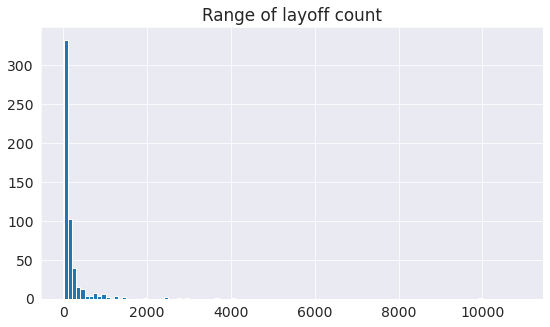

In [ ]:
plt.hist(layoff_df.Laid_Off_Count, bins=np.arange(5, 11000, 100));
plt.title('Range of layoff count');

The layoff count is mostly less than 1000.

**Explore relationship between columns using scatter plots, bar charts** 

In [ ]:
# Plot the top 20 companies with most layoff count
most_layoff_company = layoff_df.sort_values('Laid_Off_Count', ascending=False).head(20).Company
most_layoff_count = layoff_df.sort_values('Laid_Off_Count', ascending=False).head(20).Laid_Off_Count
most_layoff_industry = layoff_df.sort_values('Laid_Off_Count', ascending=False).head(20).Industry

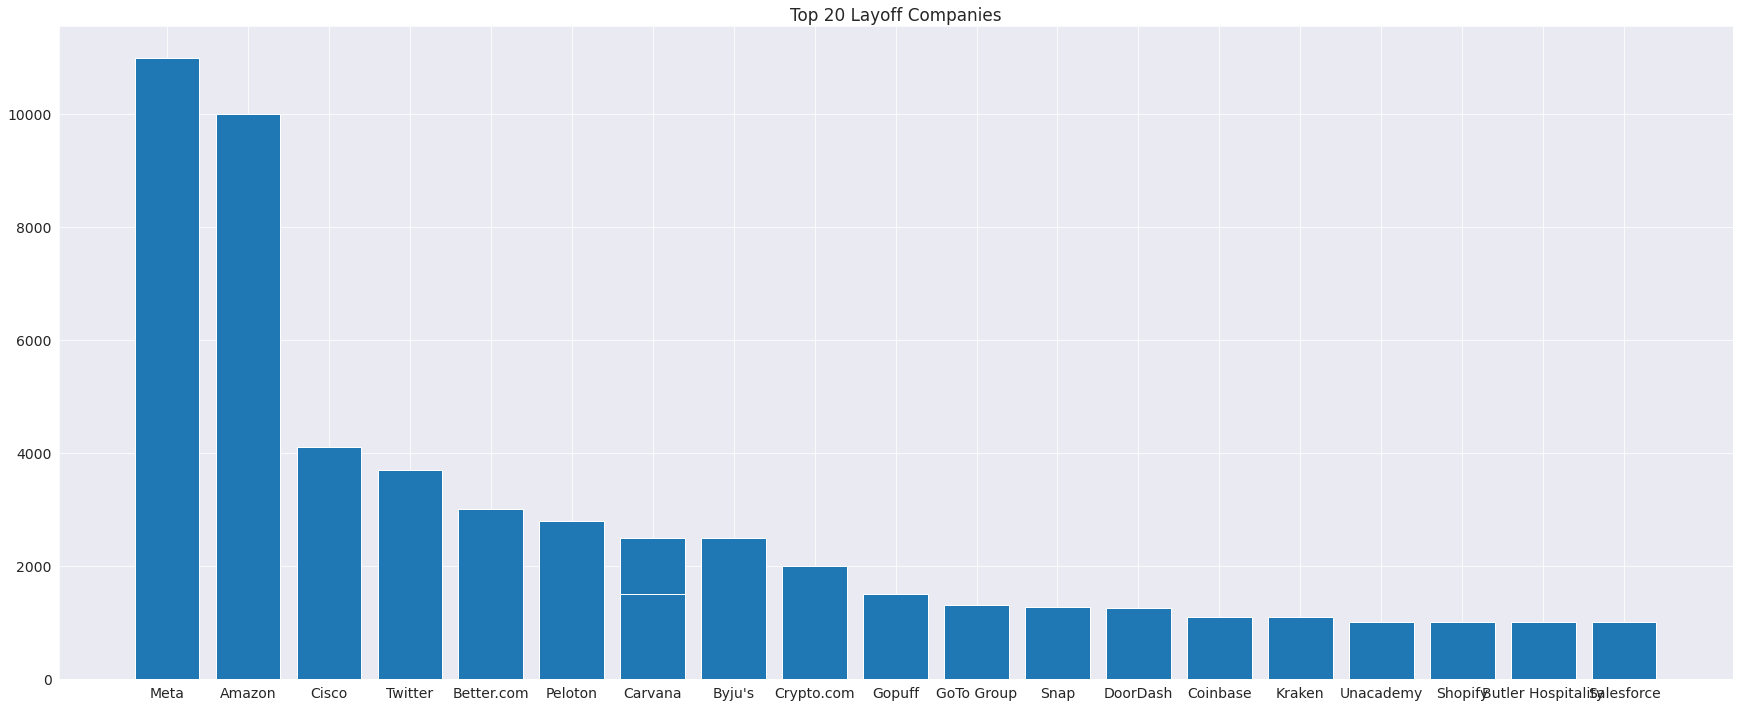

In [ ]:
# bar chart
plt.figure(figsize=(30, 12))
plt.bar(most_layoff_company, most_layoff_count);
plt.title('Top 20 Layoff Companies');

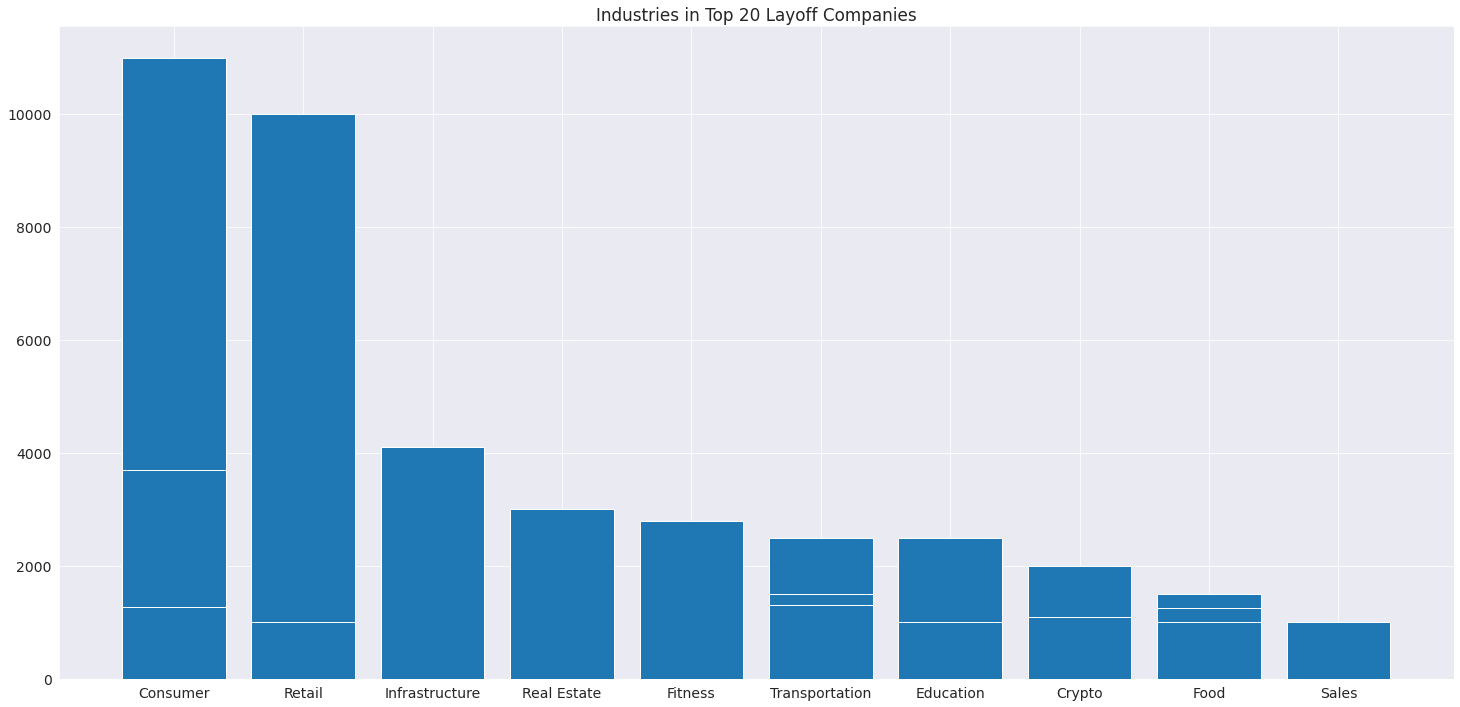

In [ ]:
# bar chart
plt.figure(figsize=(25, 12))
plt.bar(most_layoff_industry, most_layoff_count);
plt.title('Industries in Top 20 Layoff Companies');

In the top 20 layoff companies, consumer and retail industries account for the most. 

In [ ]:
# Check different industries
unique_industry = layoff_df['Industry'].unique()
unique_industry 

array(['Healthcare', 'Finance', 'Product', 'Food', 'HR', 'Transportation',
       'Marketing', 'Security', 'Real Estate', 'Legal', 'Retail', 'Media',
       'Unknown', 'Crypto', 'Education', 'Other', 'Consumer',
       'Infrastructure', 'Data', 'Sales', 'Fitness', 'Support',
       'Logistics', 'Recruiting', 'Construction', 'Aerospace', 'Travel',
       'Energy'], dtype=object)

In [ ]:
# Count the number of different industries
number_industry = layoff_df['Industry'].unique().size
print('The number of unique industries is {}'.format(number_industry))

The number of unique industries is 28


In [ ]:
# Compute the total layoff count for each industry
layoff_count_industry = layoff_df.groupby('Industry').Laid_Off_Count.sum().sort_values(ascending=False)
layoff_count_industry

Industry
Consumer          18050.0
Retail            17005.0
Transportation    12725.0
Finance           10577.0
Real Estate        8076.0
Food               7621.0
Healthcare         7084.0
Crypto             6837.0
Education          6163.0
Fitness            5196.0
Infrastructure     4711.0
Security           3185.0
Other              2969.0
Marketing          2721.0
Sales              2274.0
Media              1586.0
Logistics          1323.0
Data               1039.0
Support             966.0
Product             741.0
Travel              565.0
HR                  496.0
Construction        490.0
Unknown             298.0
Legal               290.0
Recruiting          173.0
Aerospace           100.0
Energy               30.0
Name: Laid_Off_Count, dtype: float64

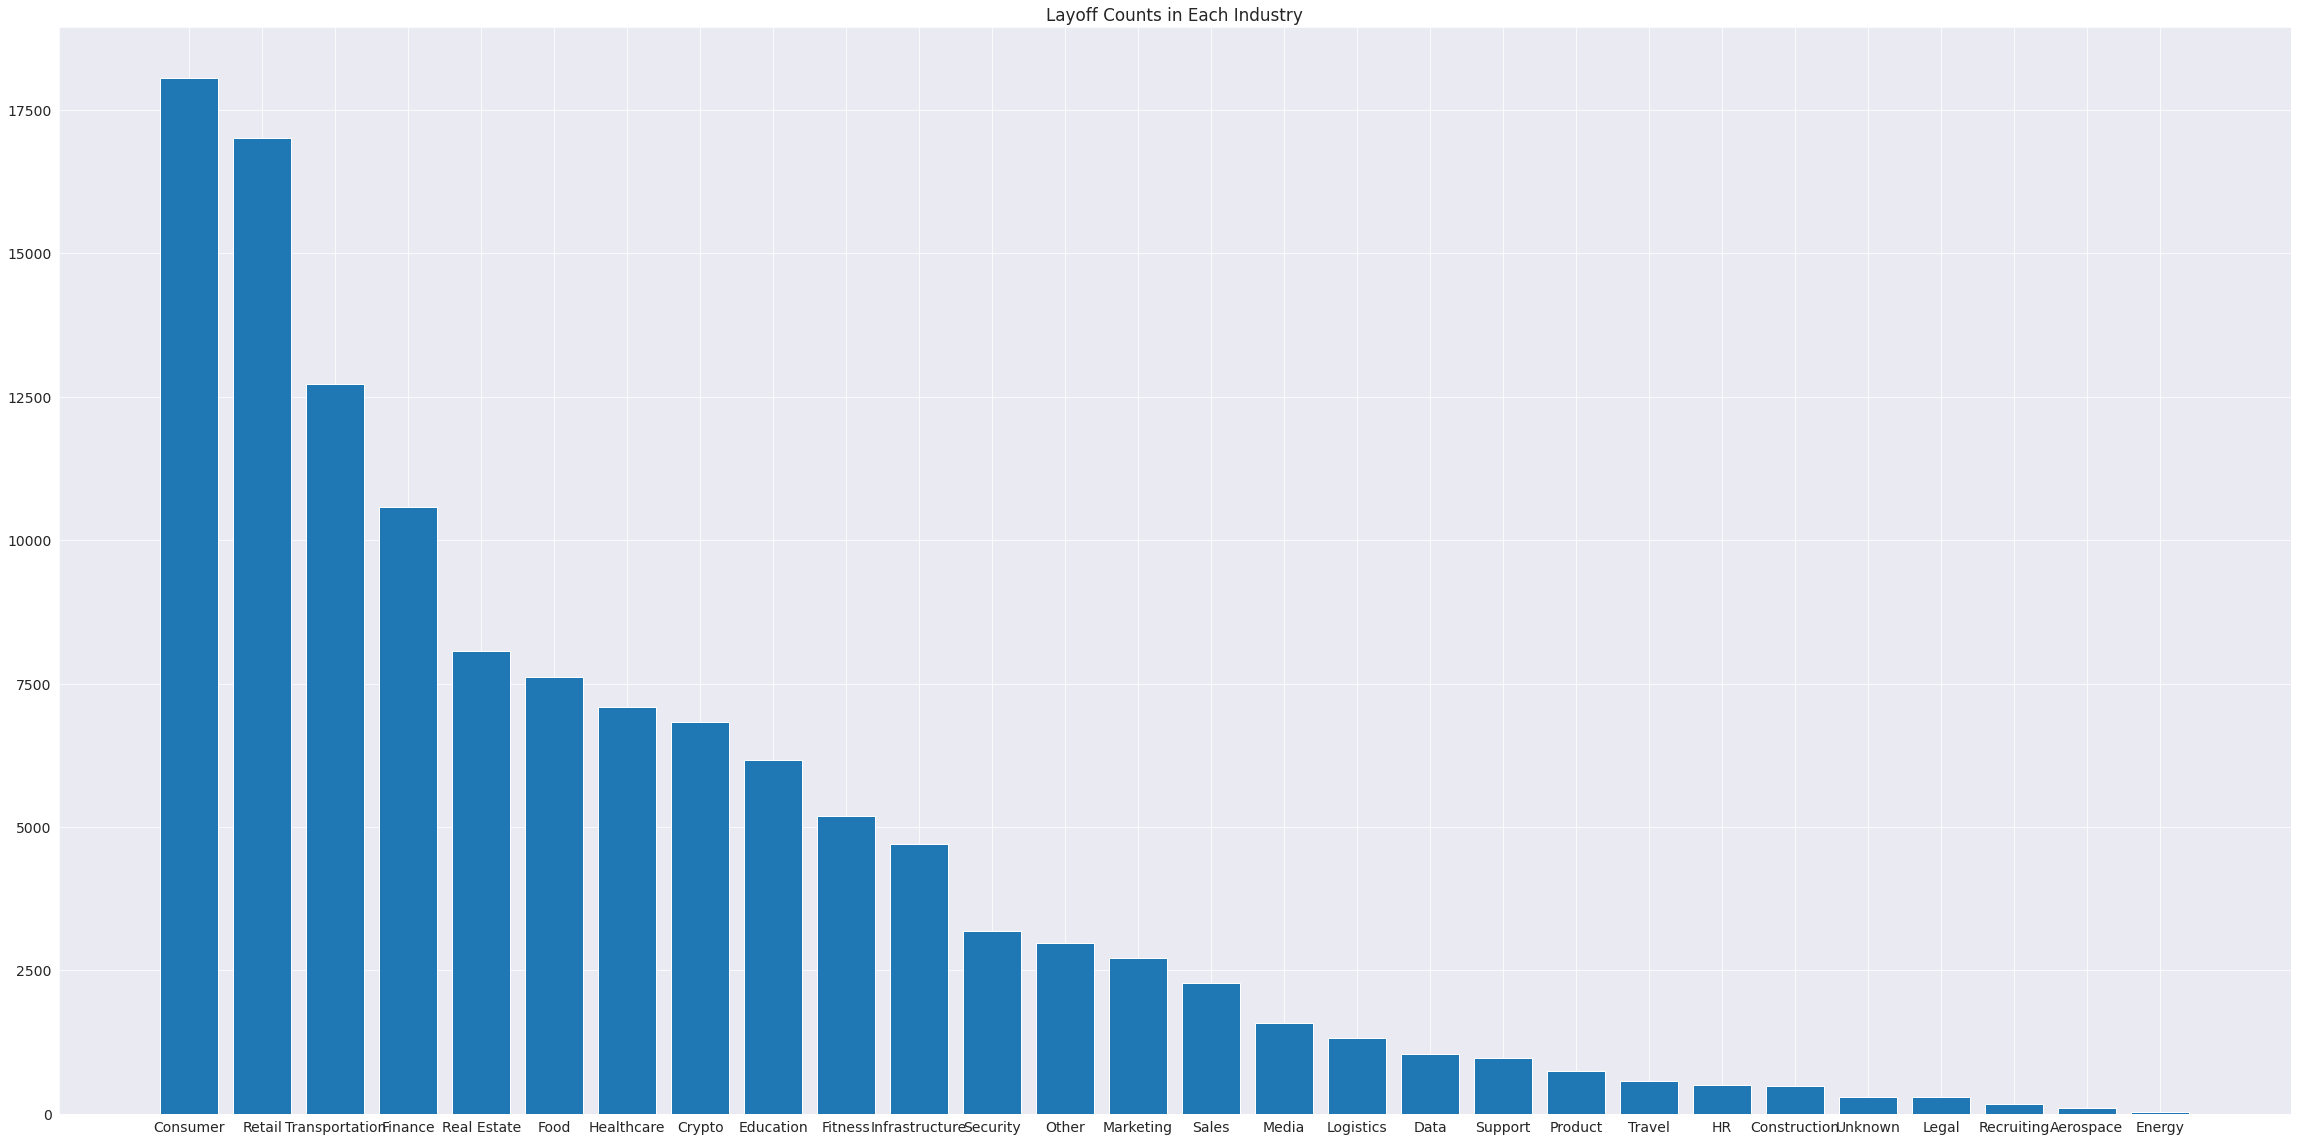

In [ ]:
# Plot a bar char to show the layoff count for each industry in descending order
plt.figure(figsize=(40, 20))
plt.bar(layoff_count_industry.index, layoff_count_industry.values);
plt.title('Layoff Counts in Each Industry');

The top 4 industries account for the most layoffs among 28 different industries is Consumer, Retail, Transportation and Finance.

In [ ]:
# Check different industries
unique_country = layoff_df['Country'].unique()
unique_country

array(['Brazil', 'United Kingdom', 'United States', 'India', 'Singapore',
       'Israel', 'Indonesia', 'Argentina', 'Australia', 'Germany',
       'Canada', 'Nigeria', 'Sweden', 'Ireland', 'Kenya', 'Estonia',
       'Norway', 'Denmark', 'Thailand', 'Senegal', 'Hong Kong', 'China',
       'United Arab Emirates', 'Austria', 'Finland', 'Malaysia', 'Mexico',
       'Russia', 'Seychelles'], dtype=object)

In [ ]:
# Compute the total layoff count for each country
layoff_count_country = layoff_df.groupby('Country').Laid_Off_Count.sum().sort_values(ascending=False)
layoff_count_country

Country
United States           90387.0
India                    8861.0
Brazil                   4009.0
Canada                   2976.0
Singapore                2779.0
United Kingdom           2769.0
Germany                  2136.0
Indonesia                1731.0
Israel                   1623.0
Sweden                   1482.0
Australia                 760.0
China                     480.0
United Arab Emirates      459.0
Russia                    400.0
Kenya                     349.0
Senegal                   300.0
Austria                   270.0
Finland                   250.0
Argentina                 233.0
Ireland                   209.0
Denmark                   185.0
Estonia                   143.0
Norway                    140.0
Mexico                     80.0
Seychelles                 75.0
Nigeria                    70.0
Thailand                   55.0
Malaysia                   50.0
Hong Kong                  30.0
Name: Laid_Off_Count, dtype: float64

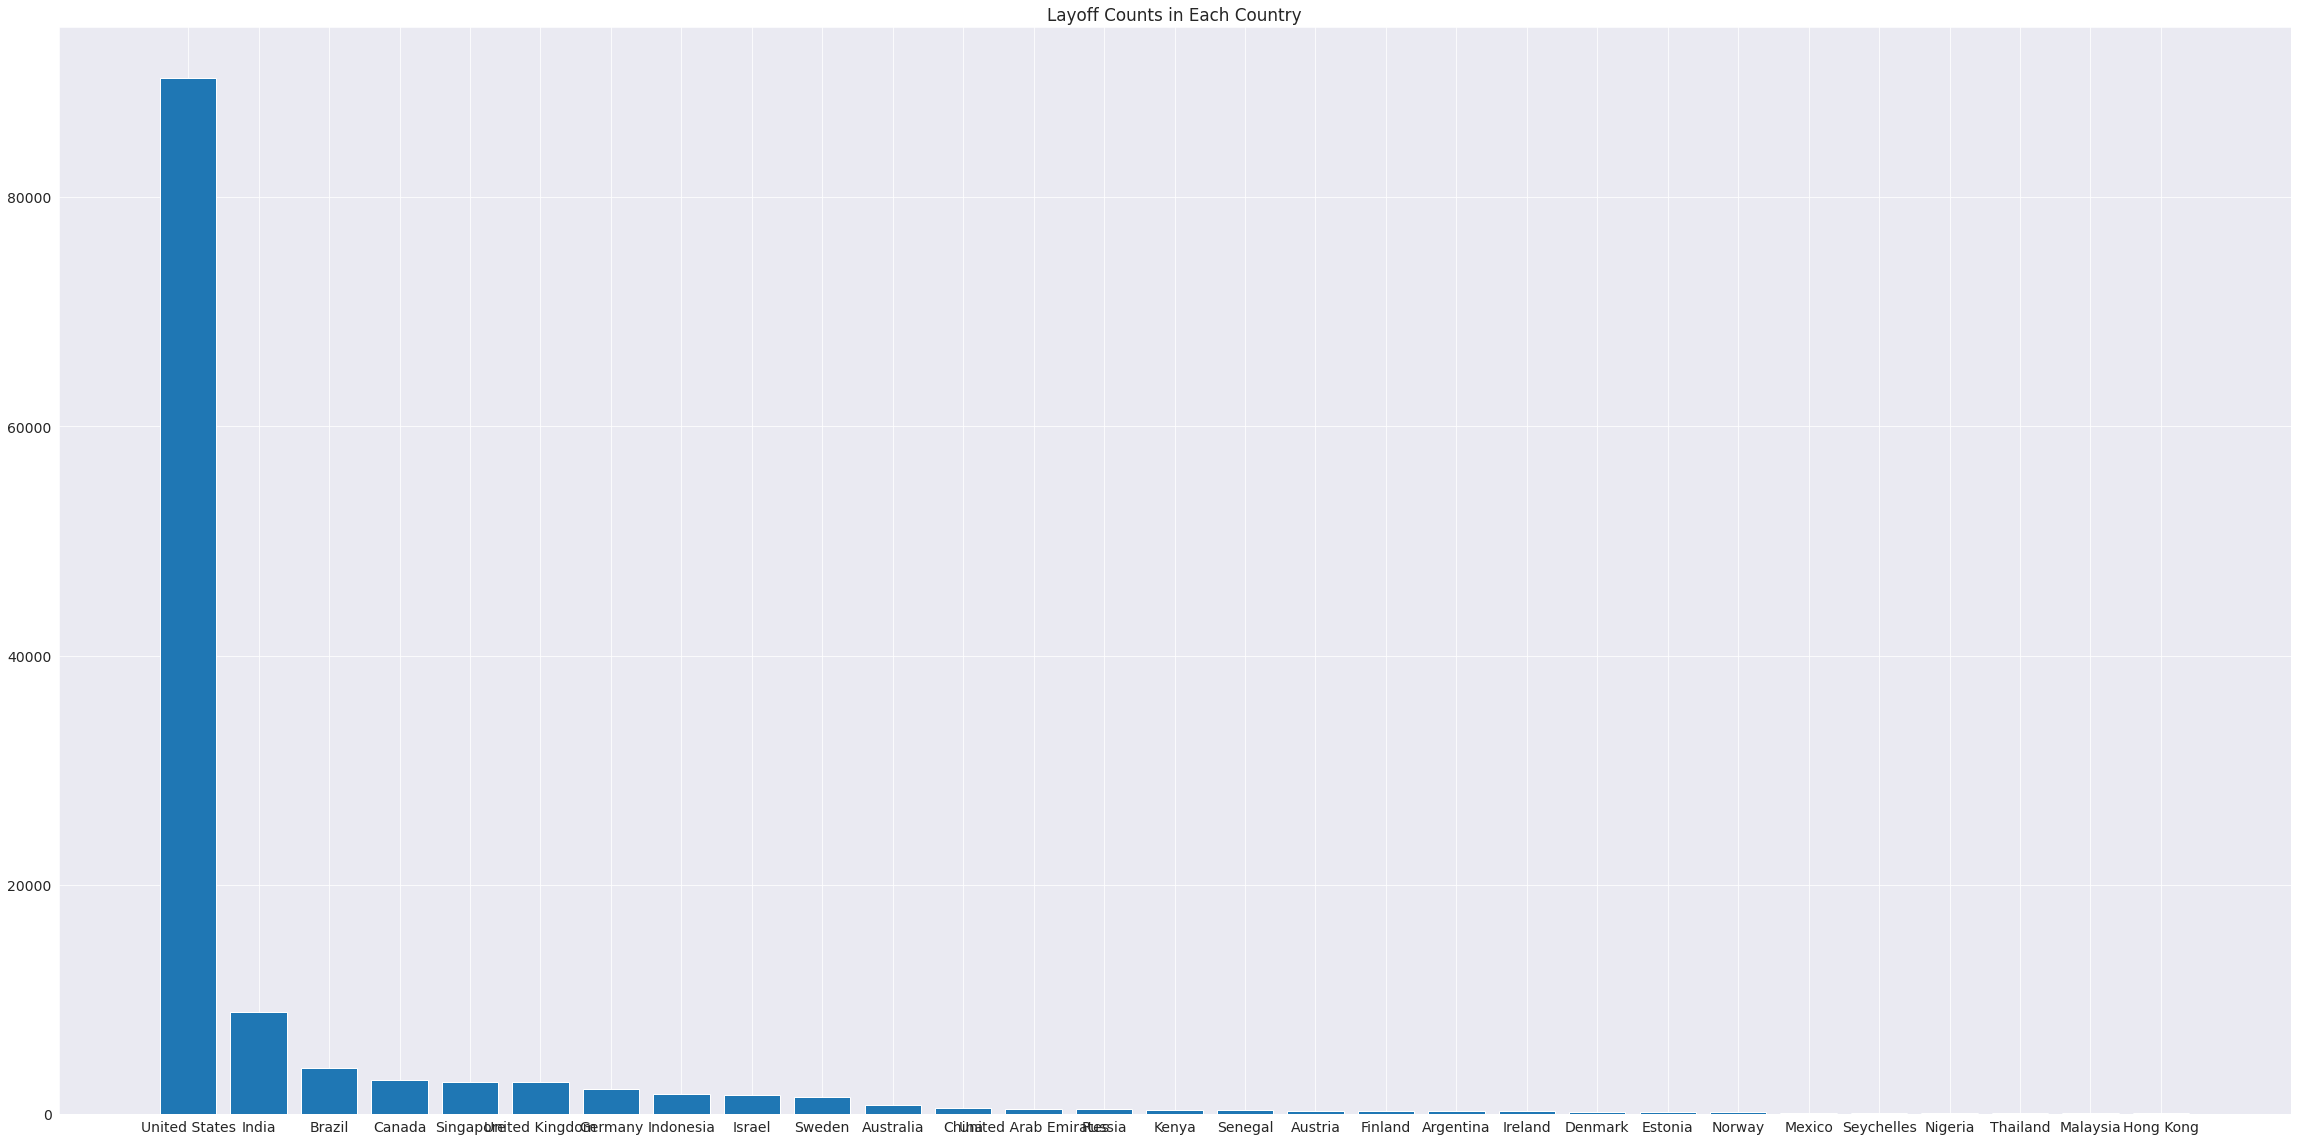

In [ ]:
# Plot a bar char to show the layoff count for each country in descending order
plt.figure(figsize=(40, 20))
plt.bar(layoff_count_country.index, layoff_count_country.values);
plt.title('Layoff Counts in Each Country');

United States accounts for the most layoffs, way many more than the second country India. 

In [ ]:
# Compute monthly layoff count 
layoff_count_monthly = layoff_df.groupby('Month').Laid_Off_Count.sum()
layoff_count_monthly

Month
1        80.0
2      3325.0
3      4514.0
4      2581.0
5     11185.0
6     14361.0
7      9982.0
8     10527.0
9      3893.0
10    10399.0
11    48571.0
12     3873.0
Name: Laid_Off_Count, dtype: float64

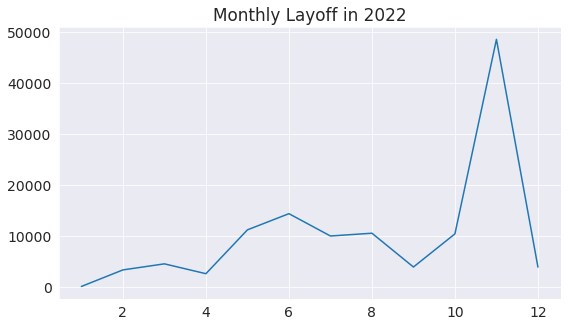

In [ ]:
# Line char for monthly layoff count
plt.plot(layoff_count_monthly.index, layoff_count_monthly.values);
plt.title('Monthly Layoff in 2022');

Throughout 2022, there are a monthly layoff peaks, i.e., November.

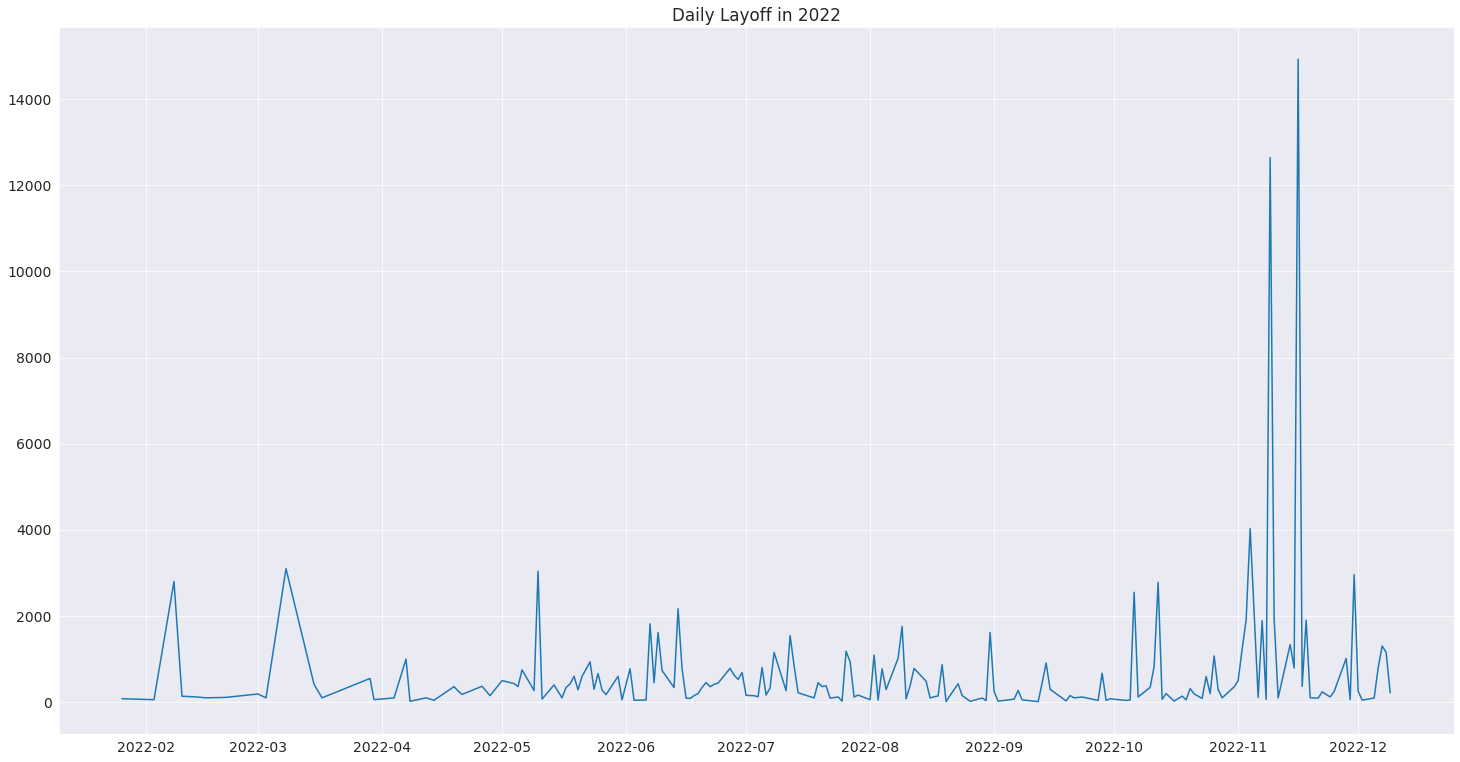

In [ ]:
# Compute daily layoff count 
layoff_count_daily = layoff_df.groupby('Date').Laid_Off_Count.sum()

# Line char for daily layoff count
plt.figure(figsize=(25, 13))
plt.plot(layoff_count_daily.index, layoff_count_daily.values);
plt.title('Daily Layoff in 2022');

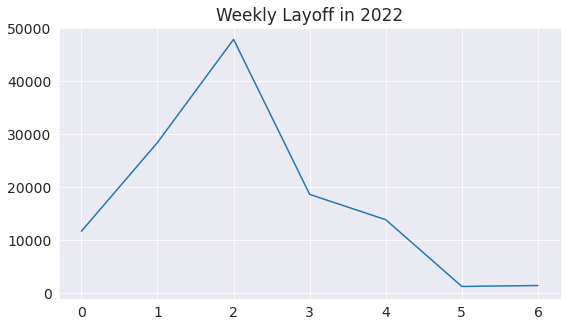

In [ ]:
# Compute weekly layoff count 
layoff_count_weekly = layoff_df.groupby('Weekday').Laid_Off_Count.sum()

# Line char for weekly layoff count
plt.plot(layoff_count_weekly.index, layoff_count_weekly.values);
plt.title('Weekly Layoff in 2022');

Layoff mostly happens on Wednesday.

## Inferences and Conclusion

- The layoff count is mostly less than 1000.
- In the top 20 layoff companies, consumer and retail industries account for the most. 
- The top 4 industries account for the most layoffs among 28 different industries is Consumer, Retail, Transportation and Finance.
- United States accounts for the most layoffs, way many more than the second country India. 
- Throughout 2022, there are a layoff peaks, i.e., November. 
- Layoff mostly happens on Wednesday.

## References and Future Work

Reference:
https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas

Future Work:
Use the layoff data in 2022 to predict layoff situations in 2023.

In [ ]:
import jovian

In [ ]:
jovian.commit()